In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import random

plt.rcParams["text.usetex"] = 'true'
plt.rcParams['text.latex.unicode'] = 'true'
plt.rcParams['font.family'] = 'Computer Modern Roman'
#plt.rcParams["font.family"] = 'CMU Concrete'

Text(0.5, 1.0, 'Lasso Regression')

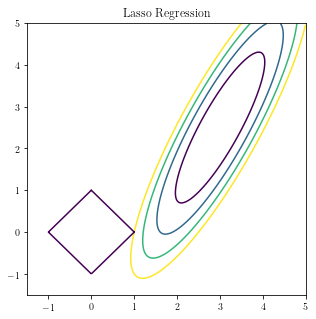

In [93]:
x1 = np.arange(-5, 5, 0.01)
x2 = np.arange(-5, 5, 0.01)
X1, X2 = np.meshgrid(x1, x2)
betaopt = [3, 2.5]
Y = 3*(X1-betaopt[0])**2+(X2-betaopt[1])**2 - 3*(X1-betaopt[0])*(X2-betaopt[1])
P1 = 1*np.abs(X1)+1*np.abs(X2)
m = 3*(1-betaopt[0])**2+(0-betaopt[1])**2 - 3*(1-betaopt[0])*(0-betaopt[1])
objlevels = np.linspace(0, m, 5)

plot = plt.figure(figsize=(5, 5))
ax = plt.gca()
OBJ = ax.contour(X1, X2, Y, levels=objlevels[1:])
PEN = ax.contour(X1, X2, P1, levels=[1])
plt.ylim(top=5, bottom=-1.5)
plt.xlim(left=-1.5, right=5)
#plt.axis('off')
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Lasso Regression')

Text(0.5, 1.0, 'Ridge Regression')

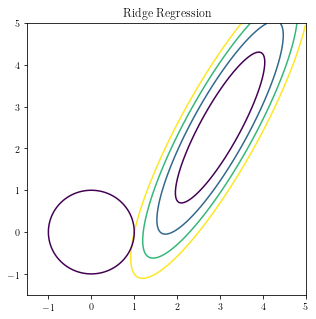

In [92]:
x1 = np.arange(-5, 5, 0.01)
x2 = np.arange(-5, 5, 0.01)
X1, X2 = np.meshgrid(x1, x2)
betaopt = [3, 2.5]
Y = 3*(X1-betaopt[0])**2+(X2-betaopt[1])**2 - 3*(X1-betaopt[0])*(X2-betaopt[1])
P2 = X1**2+X2**2
m = 3*(1-betaopt[0])**2+(0-betaopt[1])**2 - 3*(1-betaopt[0])*(0-betaopt[1])
objlevels = np.linspace(0, m, 5)

plot = plt.figure(figsize=(5, 5))
ax = plt.gca()
OBJ = ax.contour(X1, X2, Y, levels=objlevels[1:])
PEN = ax.contour(X1, X2, P2, levels=[1])
plt.ylim(top=5, bottom=-1.5)
plt.xlim(left=-1.5, right=5)
#plt.axis('off')
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Ridge Regression')

In [81]:
objlevels[1:]

array([1.81666667, 3.53333333, 5.25      ])

In [ ]:
ax = plt.gca()
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#ax.set_aspect('equal', 'datalim')

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,1], alpha=0.5,
           linestyles=['--'])
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
plt.xlabel(r'$x_{i1}$', fontsize=16)
plt.ylabel(r'$x_{i2}$', fontsize=16)
t = u'Stödvektormaskin med Gaussisk kärna'
plt.title(t, fontsize=18)
#plt.show()

pp = PdfPages('Figure1.pdf')
plt.savefig(pp, format='pdf')
pp.close()